In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from numpy.random import randn
%matplotlib inline
%config lnlineBackend.figure_format = 'retina'

<AxesSubplot:>

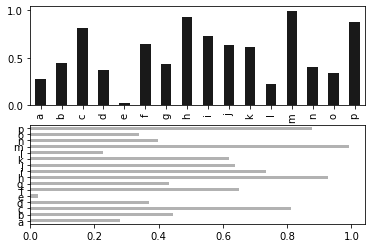

In [18]:
fig, axes = plt.subplots(2,1)
data = Series(np.random.rand(16), index = list('abcdefghijklmnop'))
data.plot(kind='bar',ax=axes[0],color='k',alpha=0.9)
data.plot(kind='barh',ax=axes[1],color='k',alpha=0.3)

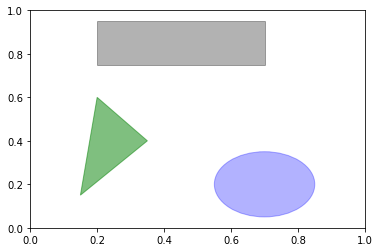

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect=plt.Rectangle((0.2,0.75),0.5,0.2,color='k',alpha=0.3)
circ=plt.Circle((0.7,0.2),0.15,color='b',alpha=0.3)
pgon=plt.Polygon([[0.15,0.15],[0.35,0.4],[0.2,0.6]],color='g',alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

<AxesSubplot:>

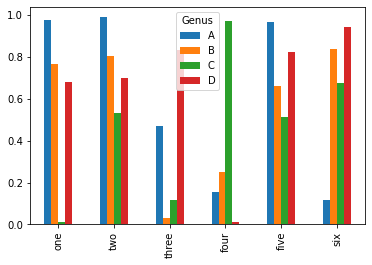

In [20]:
df = DataFrame(np.random.rand(6,4),
              index=['one','two','three','four','five','six'],
              columns= pd.Index(['A','B','C','D'],name='Genus'))
df.plot(kind='bar')

<AxesSubplot:>

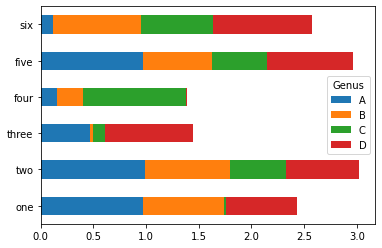

In [21]:
df.plot(kind='barh',stacked=True)

In [22]:
obj = Series(range(4),index=['d','a','b','c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [23]:
obj = obj.sort_index() ; obj

a    1
b    2
c    3
d    0
dtype: int64

In [24]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['three','one'],
                  columns=['d','a','b','c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [25]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [26]:
frame.sort_index(1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [27]:
frame.sort_index(1,ascending = False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [28]:
frame = DataFrame({'b':[4,7,3,2], 'a':[4,9,2,5],'c':[5,3,7,9]});frame

,b,a,c
0,4,4,5
1,7,9,3
2,3,2,7
3,2,5,9


In [29]:
frame.sort_values(by='b')

,b,a,c
3,2,5,9
2,3,2,7
0,4,4,5
1,7,9,3


In [30]:
obj=Series([100,23,55,44,22,99,33]);obj

0    100
1     23
2     55
3     44
4     22
5     99
6     33
dtype: int64

In [31]:
obj.rank()

0    7.0
1    2.0
2    5.0
3    4.0
4    1.0
5    6.0
6    3.0
dtype: float64

In [32]:
obj.rank(ascending=False)

0    1.0
1    6.0
2    3.0
3    4.0
4    7.0
5    2.0
6    5.0
dtype: float64

In [33]:
obj=Series([100,23,100,44,22,99,33]);obj.rank()

0    6.5
1    2.0
2    6.5
3    4.0
4    1.0
5    5.0
6    3.0
dtype: float64

In [34]:
frame = DataFrame({'b':[4,7,3,2],'a':[4,9,2,5],'c':[5,3,7,np.nan]})
frame

,b,a,c
0,4,4,5.0
1,7,9,3.0
2,3,2,7.0
3,2,5,NaN


In [35]:
frame.sum()

b    16.0
a    20.0
c    15.0
dtype: float64

In [36]:
frame.mean()

b    4.0
a    5.0
c    5.0
dtype: float64

In [37]:
frame.sum(skipna=False)

b    16.0
a    20.0
c     NaN
dtype: float64

In [38]:
frame.idxmax() #최대치 있는 위치 반환

b    1
a    1
c    2
dtype: int64

In [39]:
frame.idxmin() #최소치 있는 위치 반환

b    3
a    2
c    1
dtype: int64

In [40]:
obj = Series(['c','a','d','a','a','b','b','c','c']);obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [41]:
uniques = obj.unique() ; uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [42]:
obj.value_counts()  #중복된 항목 빈도 수 계산

a    3
c    3
b    2
d    1
dtype: int64

In [43]:
obj.value_counts(sort = False)

c    3
b    2
d    1
a    3
dtype: int64

In [44]:
obj.isin(['b','c'])

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [45]:
frame = DataFrame({'X':['c','a','d','a','a','b','b','c','c'],
                  'Y':['f','g','d','g','h','e','d','h','f'],
                  'Z':['a','e','d','g','d','e','q','b','c']})
frame

,X,Y,Z
0,c,f,a
1,a,g,e
2,d,d,d
3,a,g,g
4,a,h,d
5,b,e,e
6,b,d,q
7,c,h,b
8,c,f,c


In [46]:
result = frame.apply(pd.value_counts)
result

,X,Y,Z
a,3.0,NaN,1.0
b,2.0,NaN,1.0
c,3.0,NaN,1.0
d,1.0,2.0,2.0
e,NaN,1.0,2.0
f,NaN,2.0,NaN
g,NaN,2.0,1.0
h,NaN,2.0,NaN
q,NaN,NaN,1.0


In [47]:
result = result.fillna(0)
result

,X,Y,Z
a,3.0,0.0,1.0
b,2.0,0.0,1.0
c,3.0,0.0,1.0
d,1.0,2.0,2.0
e,0.0,1.0,2.0
f,0.0,2.0,0.0
g,0.0,2.0,1.0
h,0.0,2.0,0.0
q,0.0,0.0,1.0


In [48]:
from numpy import nan as NA
data = Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [49]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [50]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [51]:
data.dropna(how='all')

0    1.0
2    3.5
4    7.0
dtype: float64

In [52]:
data.fillna({[1:0.5],[2:-1]})

SyntaxError: invalid syntax (<ipython-input-52-5ecf4df75d32>, line 1)

In [53]:
shopping_list = []

In [54]:
shopping_list.append('milk')
shopping_list.append('egg')
shopping_list.append('water')

In [55]:
shopping_list

['milk', 'egg', 'water']

In [56]:
foods={}

In [57]:
foods['banana']="마싯다"
foods["dirt"]="ㅋㅋ"
foods

{'banana': '마싯다', 'dirt': 'ㅋㅋ'}

In [58]:
foods['banana']

'마싯다'

In [59]:
del foods['dirt']
foods

{'banana': '마싯다'}

In [60]:
f = open('test.csv','w')
f.write('1,2,3,4,5 \n')
f.close()

In [61]:
!type test.csv

1,2,3,4,5 


In [62]:
with open('test.csv','a') as f:
    f.write('1,2,3,4,5,6 \n')
    f.write('1,2,3,4,5,7 \n')

In [63]:
with open('test.csv','w') as f:
    f.write('a,b,c,d, message \n')
    f.write('1,2,3,4, hello \n')
    f.write('5,6,7,8, world \n')
    f.write('9,10,11,12, foo \n')

In [66]:
!type test.csv

a,b,c,d, message 
1,2,3,4, hello 
5,6,7,8, world 
9,10,11,12, foo 


In [67]:
df=pd.read_csv('test.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo
